<a href="https://colab.research.google.com/github/PKopel/mpr/blob/cuda/CUDA_lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Mon_Oct_12_20:09:46_PDT_2020
Cuda compilation tools, release 11.1, V11.1.105
Build cuda_11.1.TC455_06.29190527_0


In [ ]:
!nvidia-smi

Mon Jun 13 20:21:04 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [ ]:
!unzip CUDA-Lab03.zip

Archive:  CUDA-Lab03.zip
   creating: CUDA-Lab03/
   creating: CUDA-Lab03/1 Reduction/
  inflating: CUDA-Lab03/1 Reduction/reduction.h  
  inflating: CUDA-Lab03/1 Reduction/reduction_global.cpp  
  inflating: CUDA-Lab03/1 Reduction/reduction_global_kernel.cu  
  inflating: CUDA-Lab03/1 Reduction/reduction_shared.cpp  
  inflating: CUDA-Lab03/1 Reduction/reduction_shared_kernel.cu  
   creating: CUDA-Lab03/2 Warp Divergence/
  inflating: CUDA-Lab03/2 Warp Divergence/reduction.cpp  
  inflating: CUDA-Lab03/2 Warp Divergence/reduction.h  
  inflating: CUDA-Lab03/2 Warp Divergence/reduction_kernel_interleaving.cu  
  inflating: CUDA-Lab03/2 Warp Divergence/reduction_kernel_sequential.cu  
   creating: CUDA-Lab03/3 Loop Unrolling/
  inflating: CUDA-Lab03/3 Loop Unrolling/reduction.cpp  
  inflating: CUDA-Lab03/3 Loop Unrolling/reduction.h  
  inflating: CUDA-Lab03/3 Loop Unrolling/reduction_cg_kernel.cu  
  inflating: CUDA-Lab03/3 Loop Unrolling/reduction_wp_kernel.cu  
   creating: CUDA-La

# 1. Redukcja.

In [ ]:
!cd CUDA-Lab03/'1 Reduction' &&\
 nvcc -o reduction_global reduction_global.cpp reduction_global_kernel.cu &&\
 ./reduction_global 12 &&\
 ./reduction_global 16 &&\
 ./reduction_global 24

Time= 0.052 msec, bandwidth= 0.317458 GB/s
host: 0.000243, device 0.000243
Time= 0.088 msec, bandwidth= 2.971481 GB/s
host: 0.003885, device 0.003885
Time= 14.389 msec, bandwidth= 4.664050 GB/s
host: 0.996007, device 0.996007


In [ ]:
!cd CUDA-Lab03/'1 Reduction' &&\
 nvcc -o reduction_shared reduction_shared.cpp reduction_shared_kernel.cu &&\
 ./reduction_shared 12 &&\
 ./reduction_shared 16 &&\
 ./reduction_shared 24

Time= 0.017 msec, bandwidth= 0.949797 GB/s
host: 0.000243, device 0.000243
Time= 0.026 msec, bandwidth= 10.066974 GB/s
host: 0.003885, device 0.003885
Time= 2.476 msec, bandwidth= 27.103632 GB/s
host: 0.996007, device 0.996007


In [ ]:
data_shared = [[12,0.017], [16,0.026], [24,2.476]]
shared = pd.DataFrame(data_shared, columns=['size','time'])
data_global = [[12,0.052], [16,0.088], [24,14.389]]
glob = pd.DataFrame(data_global, columns=['size','time'])

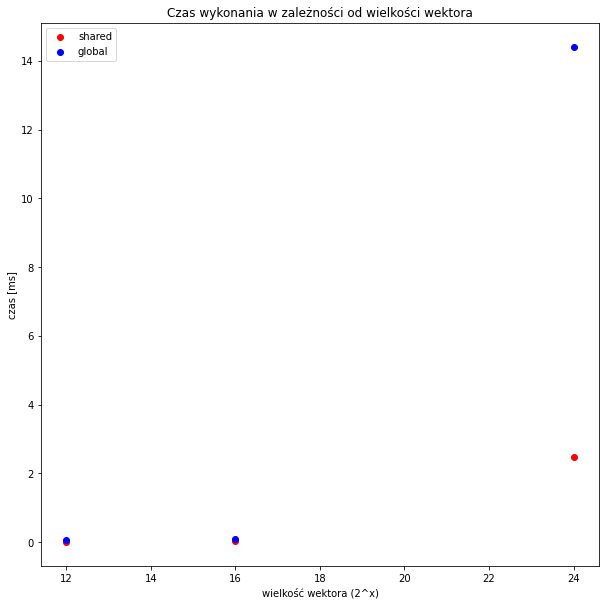

In [ ]:
plt.figure(figsize=(10,10))

plt.scatter(shared['size'],shared['time'],c='r',label='shared')
plt.scatter(glob['size'],glob['time'],c='b',label='global')

plt.legend()
plt.title(f'Czas wykonania w zależności od wielkości wektora')
plt.xlabel('wielkość wektora (2^x)')
plt.ylabel(f'czas [ms]')
plt.show()

#2. Spojrzenie na efekt „warp divergence"

In [ ]:
!cd CUDA-Lab03/'2 Warp Divergence' &&\
 nvcc -o reduction_seq reduction.cpp reduction_kernel_sequential.cu &&\
 ./reduction_seq

Time= 2.489 msec, bandwidth= 26.964346 GB/s
host: 0.996007, device 0.996007


In [ ]:
!cd CUDA-Lab03/'2 Warp Divergence' &&\
 nvcc -o reduction_int reduction.cpp reduction_kernel_interleaving.cu &&\
 ./reduction_int

Time= 3.026 msec, bandwidth= 22.177416 GB/s
host: 0.996007, device 0.996007


# 3. Loop unrolling

In [ ]:
!cd CUDA-Lab03/'3 Loop Unrolling' &&\
 nvcc -o reduction_cg reduction.cpp reduction_cg_kernel.cu &&\
 ./reduction_cg 12 &&\
 ./reduction_cg 16 &&\
 ./reduction_cg 24

Time= 0.012 msec, bandwidth= 1.360797 GB/s
host: 0.000243, device 0.000243
Time= 0.015 msec, bandwidth= 17.992039 GB/s
host: 0.003885, device 0.003885
Time= 0.812 msec, bandwidth= 82.670815 GB/s
host: 0.996007, device 0.996007


In [ ]:
!cd CUDA-Lab03/'3 Loop Unrolling' &&\
 nvcc -o reduction_wp reduction.cpp reduction_wp_kernel.cu &&\
 ./reduction_wp 12 &&\
 ./reduction_wp 16 &&\
 ./reduction_wp 24

Time= 0.012 msec, bandwidth= 1.341851 GB/s
host: 0.000243, device 0.000243
Time= 0.014 msec, bandwidth= 18.128908 GB/s
host: 0.003885, device 0.003885
Time= 0.812 msec, bandwidth= 82.675911 GB/s
host: 0.996007, device 0.996007


# 4. Operacje atomowe

In [ ]:
!cd CUDA-Lab03/'4 Atomic Operations' &&\
 nvcc -o reduction_blk reduction.cpp reduction_blk_atmc_kernel.cu &&\
 ./reduction_blk 12 &&\
 ./reduction_blk 16 &&\
 ./reduction_blk 24

Time= 0.008 msec, bandwidth= 2.073924 GB/s
host: 0.000243, device 0.000243
Time= 0.010 msec, bandwidth= 25.801575 GB/s
host: 0.003885, device 0.003885
Time= 0.807 msec, bandwidth= 83.113121 GB/s
host: 0.996007, device 0.996007


In [ ]:
!cd CUDA-Lab03/'4 Atomic Operations' &&\
 nvcc -o reduction reduction.cpp reduction_kernel.cu &&\
 ./reduction 12 &&\
 ./reduction 16 &&\
 ./reduction 24

Time= 0.021 msec, bandwidth= 0.797275 GB/s
host: 0.000243, device 0.000243
Time= 0.240 msec, bandwidth= 1.093816 GB/s
host: 0.003885, device 0.003885
Time= 35.229 msec, bandwidth= 1.904907 GB/s
host: 0.996007, device 0.995966


In [ ]:
!cd CUDA-Lab03/'4 Atomic Operations' &&\
 nvcc -o reduction_wrp reduction.cpp reduction_wrp_atmc_kernel.cu &&\
 ./reduction_wrp 12 &&\
 ./reduction_wrp 16 &&\
 ./reduction_wrp 24

Time= 0.007 msec, bandwidth= 2.250550 GB/s
host: 0.000243, device 0.000243
Time= 0.013 msec, bandwidth= 19.934904 GB/s
host: 0.003885, device 0.003885
Time= 0.806 msec, bandwidth= 83.257484 GB/s
host: 0.996007, device 0.996007


In [ ]:
data_wrp = [[12,0.007], [16,0.013], [24,0.806]]
wrp = pd.DataFrame(data_wrp, columns=['size','time'])
data_blk = [[12,0.008], [16,0.010], [24,0.807]]
blk = pd.DataFrame(data_blk, columns=['size','time'])
data = [[12,0.021], [16,0.240], [24,35.229]]
results = pd.DataFrame(data, columns=['size','time'])

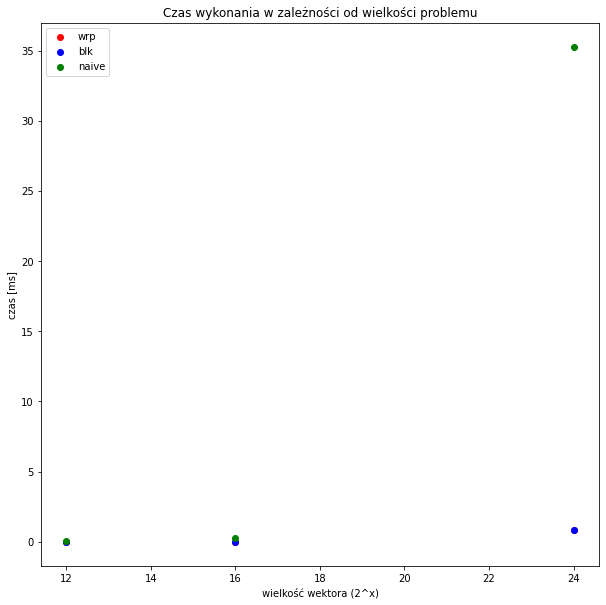

In [ ]:
plt.figure(figsize=(10,10))

plt.scatter(wrp['size'],wrp['time'],c='r',label='wrp')
plt.scatter(blk['size'],blk['time'],c='b',label='blk')
plt.scatter(results['size'],results['time'],c='g',label='naive')

plt.legend()
plt.title(f'Czas wykonania w zależności od wielkości problemu')
plt.xlabel('wielkość wektora (2^x)')
plt.ylabel(f'czas [ms]')
plt.show()

# 5. Histogram

In [ ]:
%%writefile gputimer.h
#ifndef __GPU_TIMER_H__
#define __GPU_TIMER_H__

class GpuTimer
{
    public:
      cudaEvent_t start;
      cudaEvent_t stop;
 
      GpuTimer()
      {
            cudaEventCreate(&start);
            cudaEventCreate(&stop);
      }
 
      ~GpuTimer()
      {
            cudaEventDestroy(start);
            cudaEventDestroy(stop);
      }
 
      void Start()
      {
            cudaEventRecord(start, 0);
      }
 
      void Stop()
      {
            cudaEventRecord(stop, 0);
      }
 
      float Elapsed()
      {
            float elapsed;
            cudaEventSynchronize(stop);
            cudaEventElapsedTime(&elapsed, start, stop);
            return elapsed;
      }
};

#endif  /* __GPU_TIMER_H__ */

Writing gputimer.h


In [ ]:
%%writefile histo.cu
#include <stdio.h>
#include <stdlib.h>
#include <time.h> 
#include "gputimer.h"
#include <cuda_runtime.h>

int log2(int i)
{
    int r = 0;
    while (i >>= 1) r++;
    return r;
}

int bit_reverse(int w, int bits)
{
    int r = 0;
    for (int i = 0; i < bits; i++)
    {
        int bit = (w & (1 << i)) >> i;
        r |= bit << (bits - i - 1);
    }
    return r;
}

__global__ void naive_histo(int *d_bins, const int *d_in, const int BIN_COUNT)
{
    int myId = threadIdx.x + blockDim.x * blockIdx.x;
    int myItem = d_in[myId];
    int myBin = myItem % BIN_COUNT;
    d_bins[myBin]++;
}

__global__ void simple_histo(int *d_bins, const int *d_in, const int BIN_COUNT)
{
    int myId = threadIdx.x + blockDim.x * blockIdx.x;
    int myItem = d_in[myId];
    int myBin = myItem % BIN_COUNT;
    atomicAdd(&(d_bins[myBin]), 1);
}


int main(int argc, char **argv)
{
    int deviceCount;
    cudaGetDeviceCount(&deviceCount);
    if (deviceCount == 0) {
        fprintf(stderr, "error: no devices supporting CUDA.\n");
        exit(EXIT_FAILURE);
    }
    int dev = 0;
    cudaSetDevice(dev);

    // cudaDeviceProp devProps;
    // if (cudaGetDeviceProperties(&devProps, dev) == 0)
    // {
    //     printf("Using device %d:\n", dev);
    //     printf("%s; global mem: %dB; compute v%d.%d; clock: %d kHz\n",
    //            devProps.name, (int)devProps.totalGlobalMem, 
    //            (int)devProps.major, (int)devProps.minor, 
    //            (int)devProps.clockRate);
    // }

    const int ARRAY_SIZE = 65536;
    const int ARRAY_BYTES = ARRAY_SIZE * sizeof(int);
    const int BIN_COUNT = atoi(argv[2]);
    const int BIN_BYTES = BIN_COUNT * sizeof(int);

    // generate the input array on the host
    int h_in[ARRAY_SIZE];
    for(int i = 0; i < ARRAY_SIZE; i++) {
        h_in[i] = bit_reverse(i, log2(ARRAY_SIZE));
    }
    int h_bins[BIN_COUNT];
    for(int i = 0; i < BIN_COUNT; i++) {
        h_bins[i] = 0;
    }

    // declare GPU memory pointers
    int * d_in;
    int * d_bins;

    // allocate GPU memory
    cudaMalloc((void **) &d_in, ARRAY_BYTES);
    cudaMalloc((void **) &d_bins, BIN_BYTES);

    // transfer the arrays to the GPU
    cudaMemcpy(d_in, h_in, ARRAY_BYTES, cudaMemcpyHostToDevice); 
    cudaMemcpy(d_bins, h_bins, BIN_BYTES, cudaMemcpyHostToDevice); 

    int whichKernel = 0;
    if (argc == 3) {
        whichKernel = atoi(argv[1]);
    }

    GpuTimer timer;
    timer.Start();
        
    // launch the kernel
    switch(whichKernel) {
    case 0:
        // printf("Running naive histo\n");
        naive_histo<<<ARRAY_SIZE / 64, 64>>>(d_bins, d_in, BIN_COUNT);
        break;
    case 1:
        // printf("Running simple histo\n");
        simple_histo<<<ARRAY_SIZE / 64, 64>>>(d_bins, d_in, BIN_COUNT);
        break;
    default:
        fprintf(stderr, "error: ran no kernel\n");
        exit(EXIT_FAILURE);
    }
    
    timer.Stop();
    printf("%d,%d,%f\n", whichKernel, BIN_COUNT, timer.Elapsed());

    // copy back the sum from GPU
    cudaMemcpy(h_bins, d_bins, BIN_BYTES, cudaMemcpyDeviceToHost);

    // for(int i = 0; i < BIN_COUNT; i++) {
    //     printf("bin %d: count %d\n", i, h_bins[i]);
    // }

    // free GPU memory allocation
    cudaFree(d_in);
    cudaFree(d_bins);
        
    return 0;
}

Overwriting histo.cu


In [ ]:
!nvcc -o histo histo.cu

running: `./histo <kernel> <#bins>`

In [ ]:
%%writefile run.sh
#!/usr/bin/env bash

echo "kernel,buckets,time" > results.csv

for i in 0 1; do
  for j in 10 50 100 500 1000; do
    ./histo $i $j >> results.csv
  done
done


Overwriting run.sh


In [ ]:
!chmod +x run.sh
!./run.sh

In [ ]:
results = pd.read_csv('results.csv')
results

,kernel,buckets,time
0,0,10,0.022976
1,0,50,0.023776
2,0,100,0.022976
3,0,500,0.030496
4,0,1000,0.040736
5,1,10,0.066880
6,1,50,0.048544
7,1,100,0.052672
8,1,500,0.048992
9,1,1000,0.031392


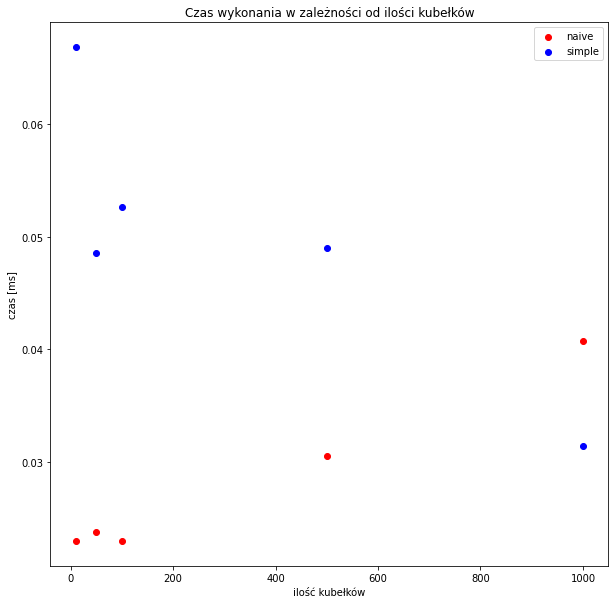

In [ ]:
plt.figure(figsize=(10,10))

naive = results[ results['kernel'] == 0]
simple = results[ results['kernel'] == 1]

plt.scatter(naive['buckets'],naive['time'],c='r',label='naive')
plt.scatter(simple['buckets'],simple['time'],c='b',label='simple')

plt.legend()
plt.title(f'Czas wykonania w zależności od ilości kubełków')
plt.xlabel('ilość kubełków')
plt.ylabel(f'czas [ms]')
plt.show()